NOTE: RUN STOCK DATA FIRST. IT IS LAST FEW CHUNKS OF CODE

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
from scipy.optimize import minimize
import datetime as dt
import sys
import os
import os
#Bs_data contains all posts containing any keywords
bs_data= pd.read_csv('bluesky_allkeywords.csv')
days = list(bs_data.columns)[1:]
#td_data contains all posts except those mentioning only CEO name
td_data = pd.read_csv('bluesky_ticker.csv')

#Functions to test if a date is a trading day
def is_trading_day(date):
    return date in stock_data.index


def next_trading_day(day):
    date = dt.datetime.strptime(day, '%Y-%m-%d')
    next_day = date + dt.timedelta(1)
    max_lookahead = 365  # prevent infinite loop going 1 year ahead
    count = 0
    while not is_trading_day(next_day):
        next_day += dt.timedelta(1)
        count += 1
        if count > max_lookahead:
            raise ValueError("No trading day found within 1 year from start date")
    return next_day.strftime('%Y-%m-%d')

for day in days:
   if is_trading_day(day) == False:
       bs_data[next_trading_day(day)] = bs_data[day] + bs_data[next_trading_day(day)]
       bs_data = bs_data.drop(columns=[day])
       td_data[day] = td_data[day] + td_data[next_trading_day(day)]
       td_data = td_data.drop(columns=[day])

#match up data with dates/ticker order
sd =stock_data
match_stock_data = sd['2024-07-31': '2025-07-30']
match_sd_pct_change = match_stock_data.pct_change()
match_sd_pct_change = match_sd_pct_change.drop('2024-07-31')
bs_data= bs_data.drop(bs_data.columns[0], axis=1)
td_data = td_data.drop(td_data.columns[0], axis =1)
bs_data.index = sp500_tickers
td_data.index = sp500_tickers

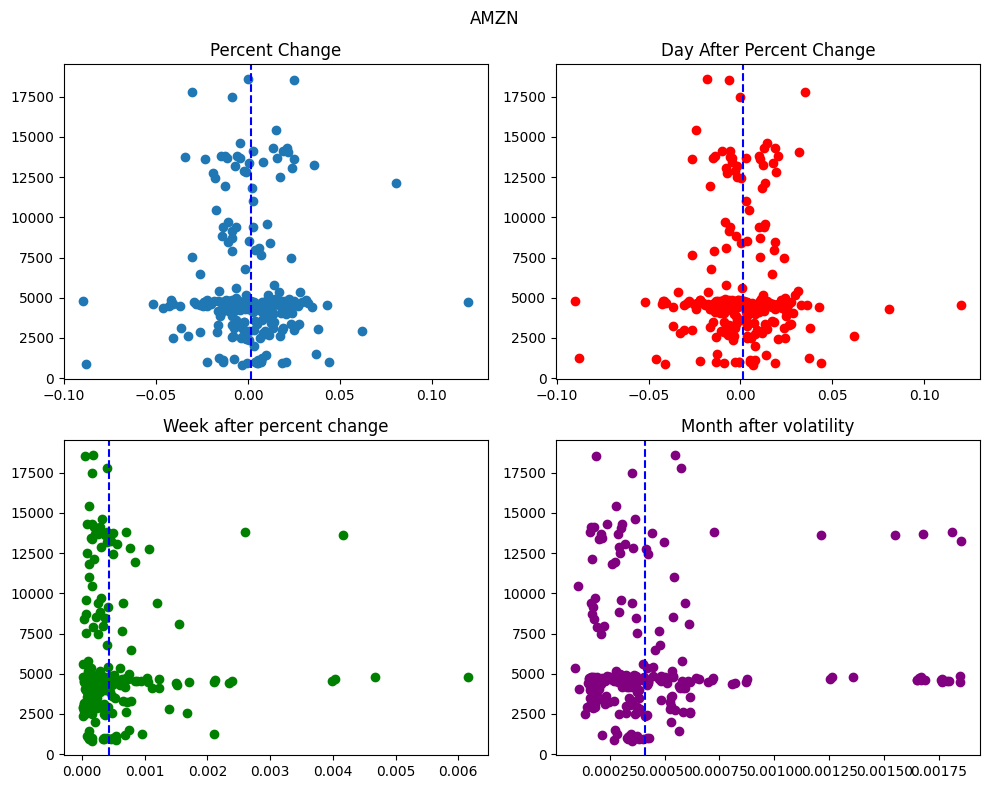

In [ ]:
#First Visualizations
# Y = # social media posts about a company, X = daily stock return/volatility
import matplotlib.pyplot as plt
company = 'AMZN'
x = match_sd_pct_change
y=bs_data.T


day_forward =  stock_data['2024-08-01': '2025-07-31']
pct_day_forward = day_forward.pct_change()
pct_day_forward = pct_day_forward.drop('2024-08-01')
x2= pct_day_forward

week_after = weekly_variance['2024-08-08': '2025-08-06']
x3 = week_after
month_after = monthly_variance['2024-09-01': '2025-09-03']
x4 = month_after

#Graph initial 
fig, axs = plt.subplots(2, 2, figsize=(10, 8)) 
fig.suptitle(company)
# Plot 1
axs[0, 0].scatter(x[company], y[company])
axs[0, 0].axvline(x=av_pct_change[company], color='b', linestyle='--', label = "super average")
axs[0, 0].set_title('Percent Change')

# Plot 2
axs[0, 1].scatter(x2[company], y[company], color = 'red')
axs[0, 1].axvline(x=av_pct_change[company], color='b', linestyle='--', label = "super average")
axs[0, 1].set_title('Day After Percent Change')

# Plot 3
axs[1, 0].scatter(x3[company], y[company], color = 'green')
axs[1, 0].axvline(x=av_weekly_variance[company], color='b', linestyle='--', label = "super average")
axs[1, 0].set_title('Week after volatility')


# Plot 4
axs[1, 1].scatter(x4[company], y[:-1][company], color = 'purple')
axs[1, 1].axvline(x=av_monthly_variance[company], color='b', linestyle='--', label = "super average")
axs[1, 1].set_title('Month after volatility')

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'monthly variance vs monthly count')

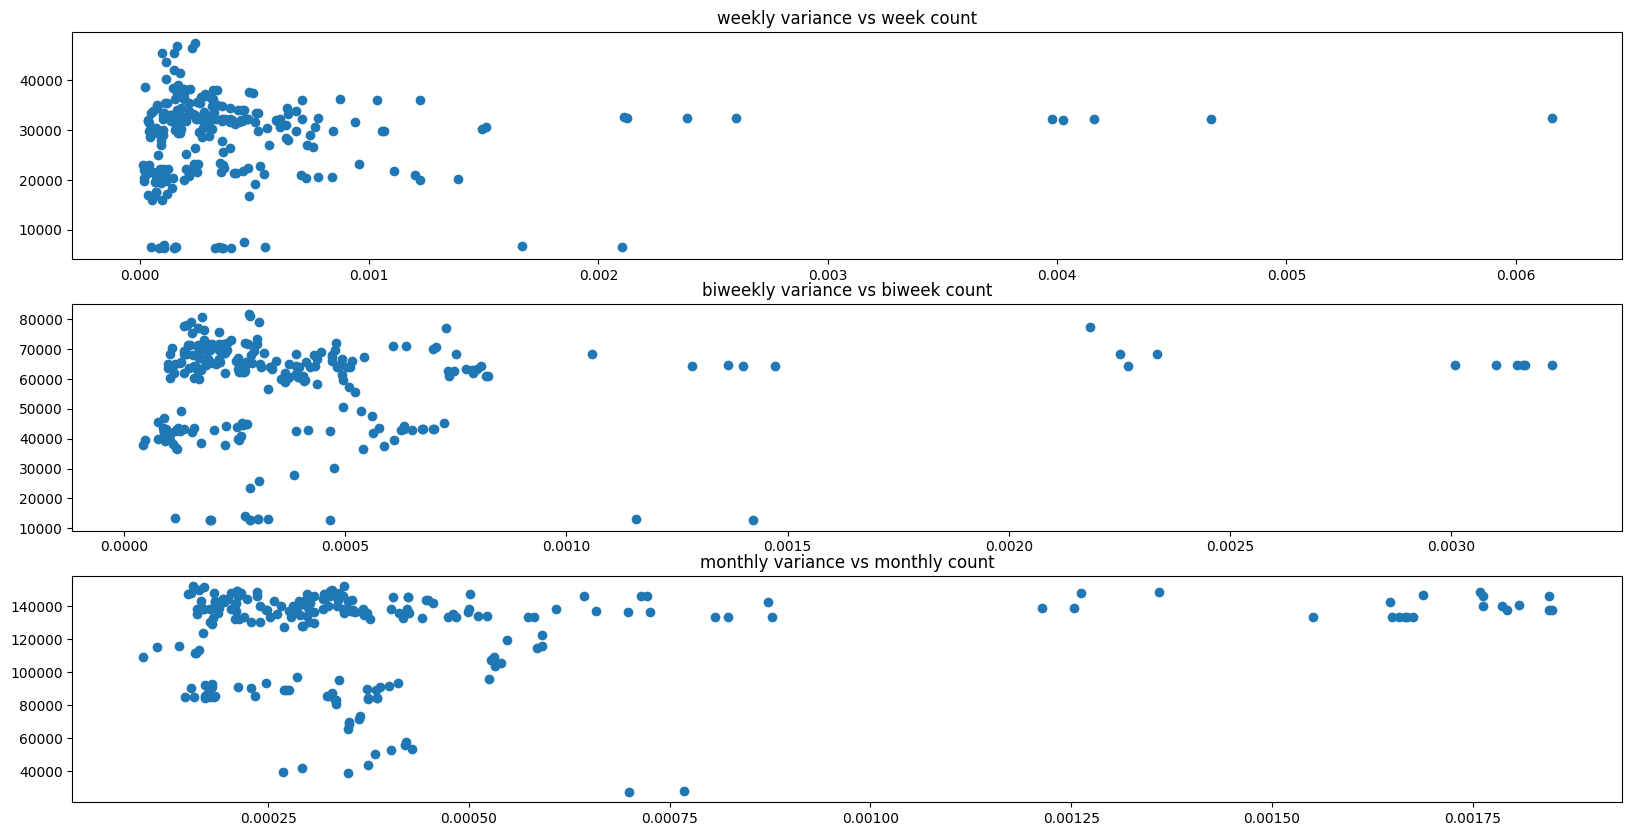

In [55]:
#Experiment with weekly counts of posts vs weekly variance
bs_weekly = bs_data.T.rolling(window=5).sum()
bs_weekly = bs_weekly.iloc[4:]
instant_weekly = weekly_variance['2024-08-07': '2025-07-30']

#biweekly vs biweekly variance
bs_biweekly = bs_data.T.rolling(window=10).sum()
bs_biweekly = bs_biweekly.iloc[9:]
instant_biweekly = biweekly_variance['2024-08-14':'2025-07-30']

#monthly count vs monthly variance
bs_monthly = bs_data.T.rolling(window=21).sum()
bs_monthly = bs_monthly.iloc[20:]
instant_monthly = monthly_variance['2024-08-29': '2025-07-30']


fig, ax = plt.subplots(3, 1, figsize=(20, 10)) 

ax[0].scatter(instant_weekly[company], bs_weekly[company])
ax[0].set_title("weekly variance vs week count")

ax[1].scatter(instant_biweekly[company], bs_biweekly[company])
ax[1].set_title("biweekly variance vs biweek count")

ax[2].scatter(instant_monthly[company], bs_monthly[company])
ax[2].set_title("monthly variance vs monthly count")


C:\Users\Thisu\AppData\Local\Temp\ipykernel_6172\2113789320.py:2: DtypeWarning: Columns (11,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  elon_data= pd.read_csv('all_musk_posts.csv')
[*********************100%***********************]  1 of 1 completed

RangeIndex(start=0, stop=240, step=1)


Text(0.5, 1.0, 'Weekly Elon vs Weekly variance')

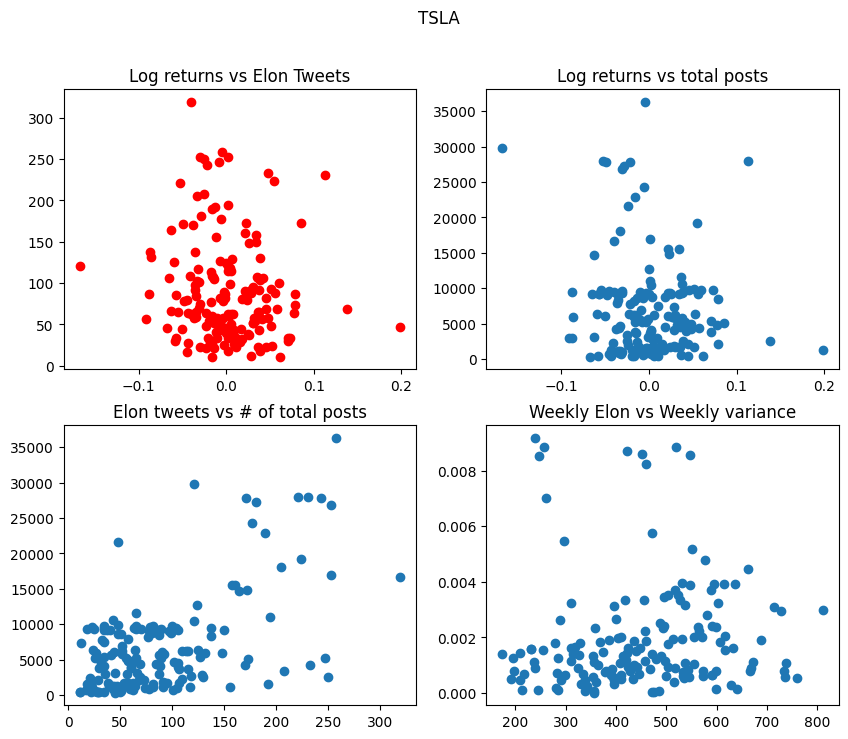

In [58]:
#study with TSLA and Elon Musk Tweets
elon_data= pd.read_csv('all_musk_posts.csv')
elon_data = elon_data["createdAt"]
elon_data = pd.to_datetime(elon_data)
elon_data = elon_data.dt.date
elon_data = elon_data.value_counts().sort_index()
elon_data = elon_data.reset_index()
elon_data.columns = ['date', 'tweets']
elon_data = elon_data.sort_values(by='date')
#Restrict to tweet counts from 2024-08-01 to 2025-03-31
elon_data = elon_data[(elon_data['date'] >= dt.date(2024, 8, 1)) & (elon_data['date'] <= dt.date(2025, 3, 28))]
elon_data = elon_data.set_index('date')
elon_data = elon_data.asfreq('D', fill_value=0)
elon_data = elon_data.reset_index()
print(elon_data.index)

TSLA_stock = yf.download('TSLA', '2024-07-31', '2025-03-29', auto_adjust=True)['Close']

tsla_log_returns = np.log(TSLA_stock/TSLA_stock.shift(1)).dropna()
tsla_dates = TSLA_stock.index


# Combine tweet counts on non-trading days to the next trading day, and delete non-trading days
def is_trading_day(day):
    return day in tsla_dates


def next_trading_day(day):
    date = day #dt.datetime.strptime(day, '%Y-%m-%d')
    next_day = date + dt.timedelta(1)
    max_lookahead = 365  # prevent infinite loop going 1 year ahead
    count = 0
    while not is_trading_day(next_day.strftime('%Y-%m-%d')):
        next_day += dt.timedelta(1)
        count += 1
        if count > max_lookahead:
            print(day)
            raise ValueError("No trading day found within 1 year from start date")
    return next_day#.strftime('%Y-%m-%d')


elon_data['date'] = elon_data['date'].dt.date
days = elon_data['date']

elon_data.set_index('date', inplace=True)
elon_data = elon_data.T

for day in days:
   if is_trading_day(day.strftime('%Y-%m-%d')) == False:
      elon_data[next_trading_day(day)] = elon_data[day] + elon_data[next_trading_day(day)]
      elon_data= elon_data.drop(columns=[day])



elon_data = elon_data.T

y=bs_data.T

y = y['2024-08-01': '2025-03-28']


elon_data_weekly = elon_data.rolling(window=5).sum()
elon_data_weekly= elon_data_weekly.iloc[4:]
weekly_variance = weekly_variance['2024-08-07': '2025-03-28']

fig, axs = plt.subplots(2,2, figsize=(10, 8)) 
fig.suptitle('TSLA')
# Plot 1
axs[0,0].scatter(tsla_log_returns["TSLA"], elon_data['tweets'], color = 'red')
axs[0,0].set_title('Log returns vs Elon Tweets')

# Plot 2
axs[0,1].scatter(tsla_log_returns["TSLA"], y['TSLA'] )
axs[0,1].set_title('Log returns vs total posts')

axs[1,0].scatter(elon_data['tweets'], y["TSLA"])
axs[1,0].set_title('Elon tweets vs # of total posts')

axs[1,1].scatter(elon_data_weekly['tweets'], weekly_variance['TSLA'])
axs[1,1].set_title('Weekly Elon vs Weekly variance')

In [163]:
#Stock data 
#RUN FIRST THEN TRY NOT TO TOUCH AFTER RUNNING
import yfinance as yf
import numpy as np

sp500_tickers = ["WMT", "AMZN", "AAPL", "CVS", "TSLA", "GOOGL", "META", "JPM", "COST", "KR",
"WBA", "TGT", "UPS", "CNC", "CI", "MSFT", "VZ", "IBM", "UNH", "XOM",
"MCK", "CVX", "CAH", "HD", "WBA", "MPC", "COR", "F", "C", "DELL",
"GM", "NVDA", "PFE", "PG", "CMCSA", "JNJ", "WFC", "BAC", "ABBV", "SBUX",
"CSCO", "T", "PEP", "INTC", "DIS", "BA", "GS", "MS", "HON", "CRM"
]

# Get the data for tickers from yahoo finance

# Download Close price data for tickers
stock_data_unordered = yf.download(sp500_tickers, '2023-01-01', '2025-10-02', auto_adjust=True)['Close']

# Download S&P 500 index data
SP500 = yf.download('^GSPC', '2023-01-01', '2025-10-02', auto_adjust=True)['Close']

# Transpose stock data so tickers are row index
stock_data_unordered = stock_data_unordered.T

# Reorder rows by original ticker list order
stock_data = stock_data_unordered.loc[sp500_tickers]
stock_data = stock_data.T



[*********************100%***********************]  49 of 49 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
#log returns
log_returns= np.log(stock_data/stock_data.shift(1)).dropna()


#Percentage change in stock returns day-to-day (in lieu of trading day variance)

sd2 = stock_data
pct_change = sd2.pct_change().dropna()
#print(pct_change)
#variance of stock returns over each week in the period (5 trading days) 

weekly_variance = log_returns.rolling(window=5).var().dropna()

#variance of stock returns over each month in the period (21 trading days)

monthly_variance = log_returns.rolling(window=21).var()

#variance of stock returns over each 2 weeks in the period (10 trading days)
SP_biweekly_variance = SP_log_returns.rolling(window=10).var().dropna()
biweekly_variance = log_returns.rolling(window=10).var().dropna()

#super averages
#average percent change in a single day

transpose_pct_change = pct_change.T
av_pct_change = transpose_pct_change.mean(axis=1)
#print(av_pct_change)

#average weekly variance
av_weekly_variance = weekly_variance.mean()

#average monthly variance
transpose_monthly = monthly_variance
av_monthly_variance = transpose_monthly.mean()

#average biweekly variance
av_biweekly_variance = biweekly_variance.mean()


#Note: variance windows are in trading days, not calendar days. Moreover, these are backwards looking rolling variances.
weekly_variance.head()

C:\Users\Thisu\AppData\Local\Temp\ipykernel_12640\3250872234.py:8: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  pct_change = sd2.pct_change().dropna()


Ticker,WMT,AMZN,AAPL,CVS,TSLA,GOOGL,META,JPM,COST,KR,...,CSCO,T,PEP,INTC,DIS,BA,GS,MS,HON,CRM
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-10,0.000185,0.000615,0.000292,0.000127,0.001386,0.000211,0.000235,0.000082,0.001135,0.000050,...,0.000258,0.000200,0.000191,0.000380,0.000175,0.000779,0.000113,0.000122,0.000471,0.000797
2023-01-11,0.000194,0.000891,0.000322,0.000127,0.001210,0.000403,0.000241,0.000080,0.001138,0.000081,...,0.000250,0.000189,0.000193,0.000305,0.000063,0.000497,0.000145,0.000118,0.000379,0.000898
2023-01-12,0.000220,0.000428,0.000234,0.000087,0.000682,0.000210,0.000254,0.000083,0.001027,0.000080,...,0.000165,0.000195,0.000205,0.000192,0.000145,0.000631,0.000009,0.000051,0.000128,0.000653
2023-01-13,0.000077,0.000413,0.000068,0.000057,0.000881,0.000209,0.000250,0.000128,0.000046,0.000064,...,0.000029,0.000159,0.000031,0.000105,0.000212,0.000362,0.000011,0.000032,0.000040,0.000664
2023-01-17,0.000051,0.000880,0.000064,0.000055,0.001212,0.000290,0.000318,0.000219,0.000018,0.000157,...,0.000091,0.000161,0.000050,0.000183,0.000219,0.000285,0.001323,0.000438,0.000185,0.000340


In [191]:

# If av_weekly_variance and av_pct_change are Series with Ticker as index
df1 = av_weekly_variance.to_frame('weekly_variance')
df2 = av_pct_change.to_frame('pct_change')
df3 = av_monthly_variance.to_frame('monthly_variance')

# Set their indices as columns if needed
df1.reset_index(inplace=True)
df2.reset_index(inplace=True)
df3.reset_index(inplace=True)
# Now merge
merged = pd.merge(df1, df2, on='Ticker', how='inner')
final = pd.merge(merged, df3, on ='Ticker', how= 'inner')
print(final.head())
final.to_csv('control_sa.csv')



  Ticker  weekly_variance  pct_change  monthly_variance
0    WMT         0.000154    0.001226          0.000152
1   AMZN         0.000424    0.001574          0.000411
2   AAPL         0.000262    0.001194          0.000273
3    CVS         0.000403    0.000084          0.000421
4   TSLA         0.001475    0.002836          0.001473


In [198]:
SP_log_returns = np.log(SP500/SP500.shift(1)).dropna()
SP_pct_change = SP500.pct_change().dropna()
Av_SP_pct_change = SP_pct_change.mean()

SP_weekly_variance = SP_log_returns.rolling(window=5).var().dropna()
SP_monthly_variance = SP_log_returns.rolling(window=21).var().dropna()


Av_SP_weekly_variance = SP_weekly_variance.mean()

Av_SP_monthly_variance = SP_monthly_variance.mean()

#smv = Av_SP_monthly_variance.to_frame
#swv = Av_SP_weekly_variance.to_frame
#merges= pd.merge(smv, swv, on='Ticker', how = 'inner')
swv = Av_SP_weekly_variance[0]
final.loc[len(final)] = ['GSPC', swv, Av_SP_pct_change[0], Av_SP_monthly_variance[0]]

final.to_csv('control_sa.csv', index = False)


C:\Users\Thisu\AppData\Local\Temp\ipykernel_12640\64663540.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  swv = Av_SP_weekly_variance[0]
C:\Users\Thisu\AppData\Local\Temp\ipykernel_12640\64663540.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  final.loc[len(final)] = ['GSPC', swv, Av_SP_pct_change[0], Av_SP_monthly_variance[0]]


In [161]:




#control matrix
SP500 = SP500.T
smv= Av_SP_monthly_variance.T
swv = Av_SP_weekly_variance.T
spc = Av_SP_pct_change.T


smv = smv.to_frame('monthly_variance')
smv = smv.set_axis(['monthly_variance'], axis=1)
smv = smv.reset_index()

swv = swv.to_frame('weekly_variance')
swv = swv.set_axis(['weekly_variance'], axis=1)
swv = swv.reset_index()

spc = spc.to_frame('daily_variance')
spc = spc.set_axis(['daily_variance'], axis=1)
spc = spc.reset_index()

spmerge = pd.merge(swv, smv,on='Date', how = 'inner')
finalsp = pd.merge(spmerge, spc, on='Date', how= 'inner')
print(finalsp)

KeyError: 'Date'